In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(50)

In [2]:
#Loading the Dataset
df= pd.read_csv('marketing_campaign.csv', sep= "\t")
print(f'Number of Records is {len(df)}')
df.head()

Number of Records is 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Some Informations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Identifying Nulls
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# Removing Nulls 
df = df.dropna()
print(f'the number of records now is {len(df)}')

the number of records now is 2216


In [6]:
# Changing data type of 'Dt_Customer' column

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst= True)

dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

# Dates of Newest and Oldest records in the Dateset
print(f"The Newest Customer's Enrolment Date in the Records is {max(dates)}")
print(f"The Oldest Customer's Enrolment Date in the Records is {min(dates)}")

The Newest Customer's Enrolment Date in the Records is 2014-06-29
The Oldest Customer's Enrolment Date in the Records is 2012-07-30


In [7]:
# Creating a Feature "Customer_For"

days = []

d1 = max(dates) 

for i in dates:
    delta = d1 - i
    days.append(delta)

df['Customer_For'] = days
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors='coerce')

In [8]:
# Breaking Down Marital_Status and Eduaction columns
print(f'Total Categories in the Feature Martial Status:\n {df['Marital_Status'].value_counts()}\n -----')
print(f'Total Categories in the Feature Education:\n {df['Education'].value_counts()}')

Total Categories in the Feature Martial Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
 -----
Total Categories in the Feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [9]:
# Feature Engineering

# Calculating Age 
df['Age'] = 2026 - df['Year_Birth']

# Calculating Total Spending
df['Spent'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Deriving living situation by marital status
df['Living_With'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Absurd': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone',
    'Divorced': 'Alone',
    'Single': 'Alone'
})

# Total Number of Children 
df['Children'] = df['Teenhome'] + df['Kidhome']

# Total Number of Family Members 
df['Family_Size'] = df['Living_With'].replace({'Alone' : 1, 'Partner': 2}) + df['Children']

# Feature Partining Parenthood
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

# Segmenting Education Level in Three Groups
df['Education'] = df['Education'].replace({
    'Basic': 'Undergraduate',
    '2nd Cycle' : 'Undergraduate',
    'Graduation' : 'Graduate',
    'Master': 'Postgraduate', 
    'PhD': 'Postgraduate'
})

# For Clarity 
df= df.rename({
    'MntWine': 'Wines', 
    'MntFruits': 'Fruits',
    'MntMeatProducts' : 'Meat',
    'MntFishProducts': 'Fish', 
    'MntSweetProducts': 'Sweet',
    'MntGoldProds' : 'Gold'

})

#Droping Some Redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis =1)

In [10]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,57.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,30.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,49.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,56.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,67.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,133.000000,2525.000000,3.000000,5.000000,1.000000


Relative Plot Of Some Selected Features: A Data Subset


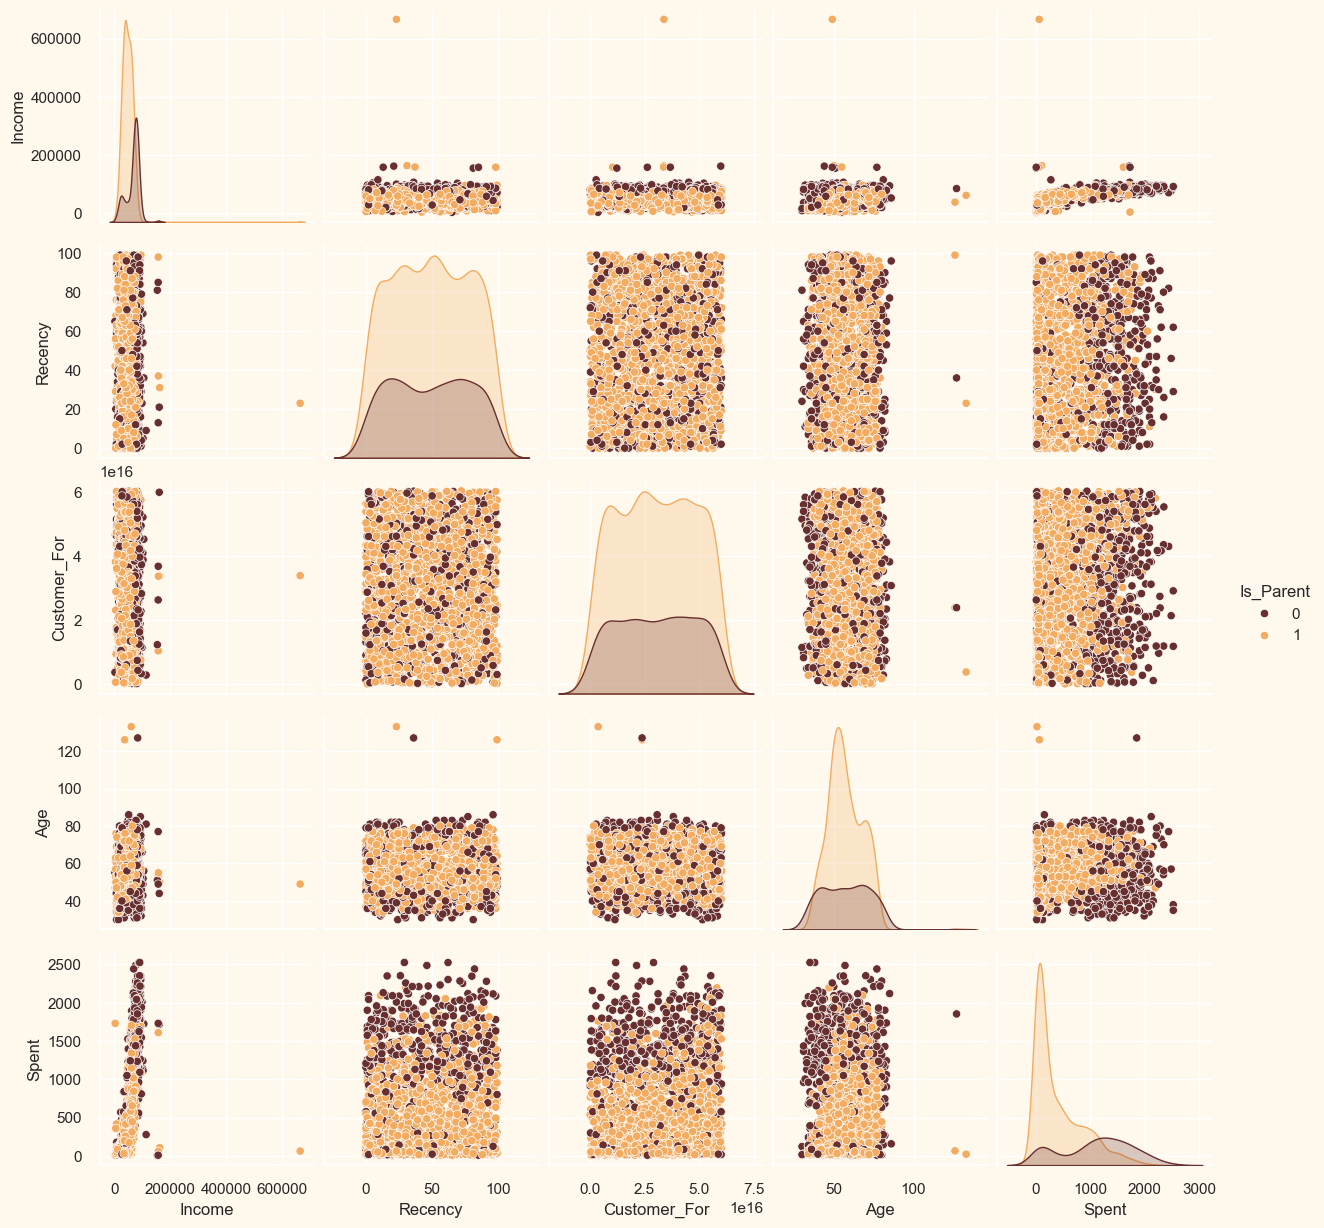

In [11]:
# Ploting Some Selected Features

#Setting up colors preferences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


# Ploting Following Features
to_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']
print('Relative Plot Of Some Selected Features: A Data Subset')
plt.Figure()
sns.pairplot(df[to_plot], hue= 'Is_Parent',palette= ["#682F2F","#F3AB60"])
plt.show()

In [12]:
# Handling With Outliers

df = df[(df["Age"]<90)]
df= df[(df['Income']<600000)]
print(f'The Total Number of Records After Removing Outliers: {len(df)}')

The Total Number of Records After Removing Outliers: 2212


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [14]:
s = (df.dtypes == 'object')
object_col = list(s[s].index)
print(f'Categorical Variables in the Dateset: {object_col}')

Categorical Variables in the Dateset: ['Education', 'Living_With']


In [15]:
# Label Encoding the object dtypes.
LE = LabelEncoder()
for i in object_col:
    df[i] = df[[i]].apply(LE.fit_transform)

print('All Features are Now Numercial')

All Features are Now Numercial


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [17]:
# Creating a Copy 
df2 = df.copy()

# Creating a Subset of Dataframe by Dropping the Features on Deals accepted and Promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

df2 = df2.drop(cols_del,axis=1)

# Scaling 
scaler = StandardScaler()
scaler.fit(df2)
scaled_df = pd.DataFrame(scaler.transform(df2), columns=df2.columns)
print('All Featues are Now Scaled')

All Featues are Now Scaled


In [18]:
# Scaled data to be used for reducing the dimensionality

print("Dataframe to be used for further modelling:")
scaled_df.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.507308,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.507308,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.507308,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.507308,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.979003,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [19]:
# Initiating PCA to reduce dimentions aka features to 3

pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds= pd.DataFrame(pca.transform(scaled_df), columns=(['col1', 'col2', 'col3']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,5.139550e-17,2.878157,-5.983627,-2.536209,-0.779118,2.380741,7.450997
col2,2212.0,3.212219e-17,1.708115,-4.258546,-1.312345,-0.171454,1.237682,6.224678
col3,2212.0,7.629019e-18,1.234753,-3.622004,-0.810377,-0.039393,0.847553,6.669034


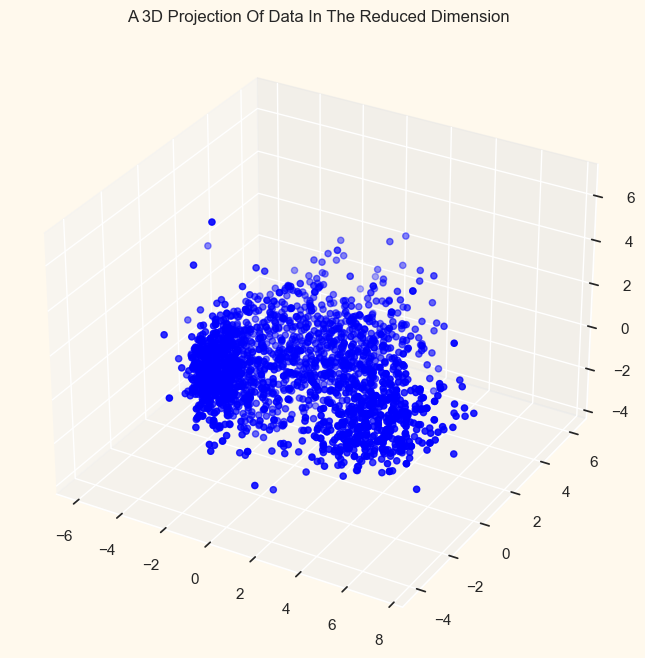

In [20]:
# A 3D Projection Of Data In The Reduced Dimension

x= PCA_ds['col1']
y= PCA_ds['col2']
z= PCA_ds['col3']

# To Plot 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to Determine the Number of Clusters to be Formed:


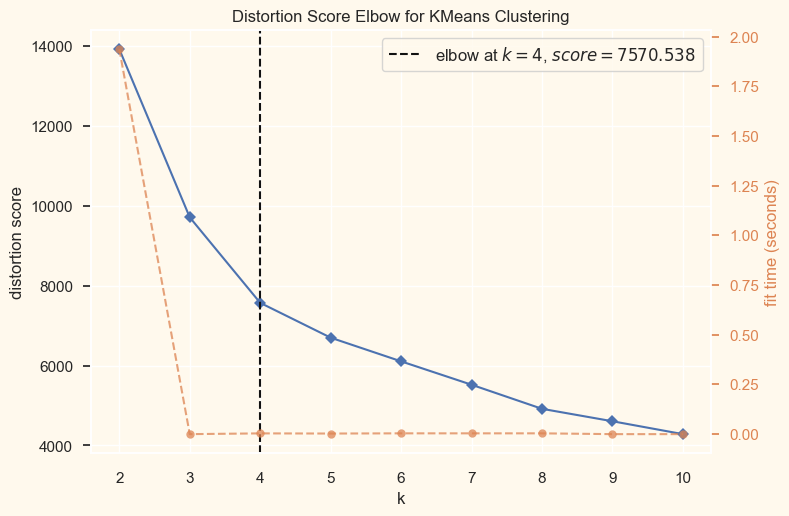

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to Determine the Number of Clusters to be Formed:')
Elbow_M = KElbowVisualizer(KMeans(),force_model=True
,k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [22]:
#Initiating the Agglomerative Clustering model

AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds['Clusters'] = yhat_AC 

# Adding the clusters feature to the original dataframe
df['Clusters'] = yhat_AC


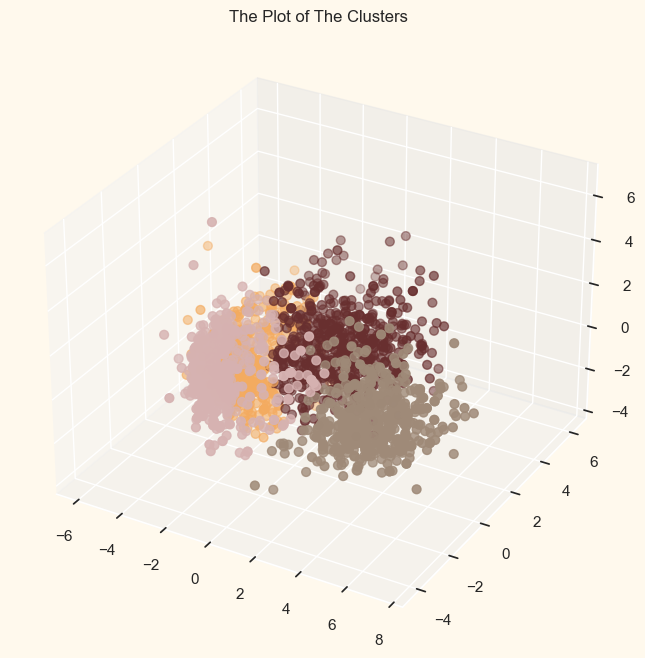

In [23]:
# Plotting the Clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111,projection = '3d', label = 'bla')
ax.scatter(x,y,z, s= 40, c= PCA_ds['Clusters'], marker='o', cmap = cmap)
ax.set_title('The Plot of The Clusters')
plt.show()

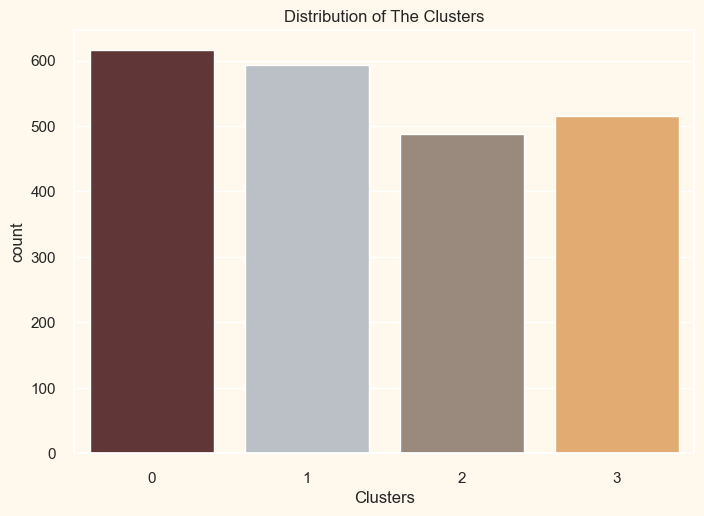

In [24]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x= df['Clusters'], palette= pal)
pl.set_title("Distribution of The Clusters")
plt.show()

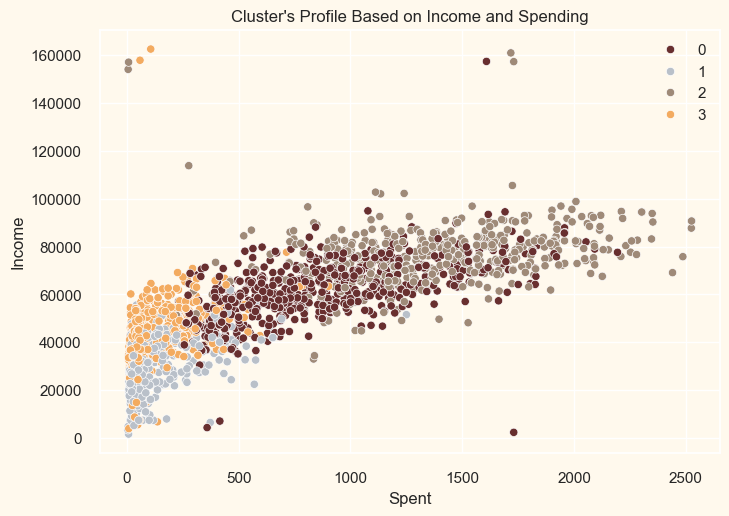

In [25]:
pl = sns.scatterplot(data = df, x= df['Spent'], y= df['Income'], hue= df['Clusters'], palette=pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()
plt.show()

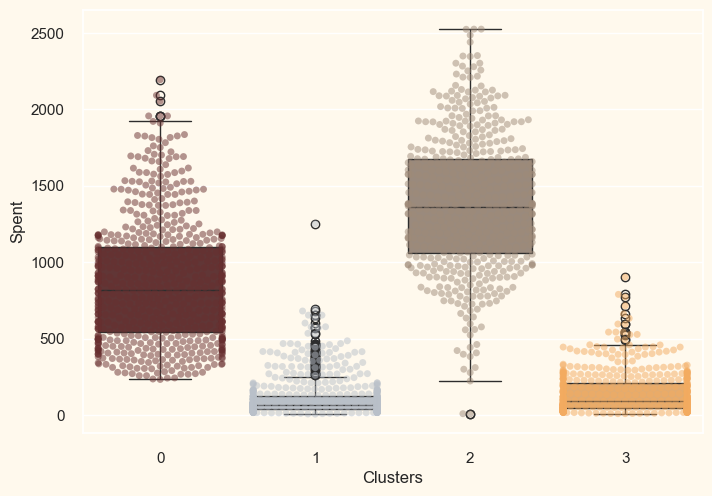

In [26]:
plt.figure()
pl = sns.swarmplot(x= df['Clusters'], y= df['Spent'], palette=pal, alpha= 0.5)
pl= sns.boxplot(x=df['Clusters'], y= df['Spent'], palette=pal)
plt.show()

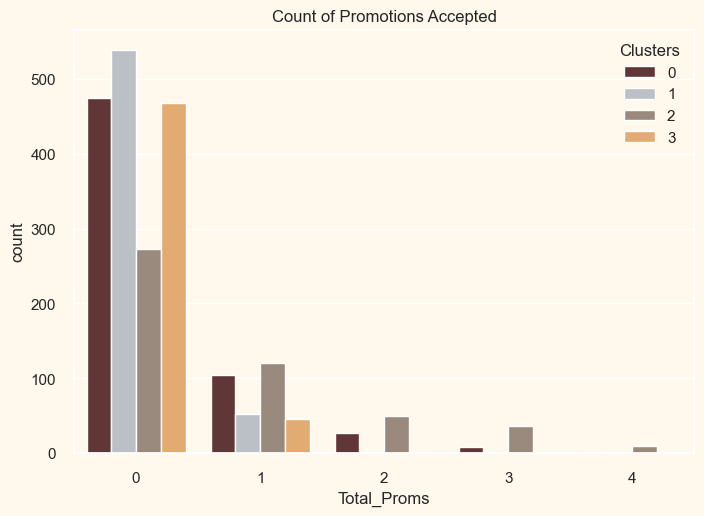

In [27]:
# Creating a Feature to Get a Sum of Accepted Promotions

df['Total_Proms'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
 
# Plotting Count of Total Campagin Accepted
plt.figure()
pl = sns.countplot(x= df['Total_Proms'], hue = df['Clusters'], palette=pal)
plt.title('Count of Promotions Accepted')
plt.show()

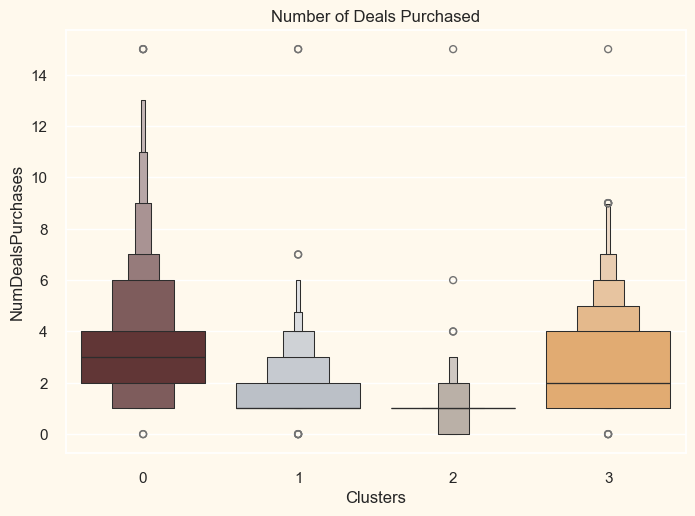

In [28]:
# Plotting the Number of Deals Purchased

plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

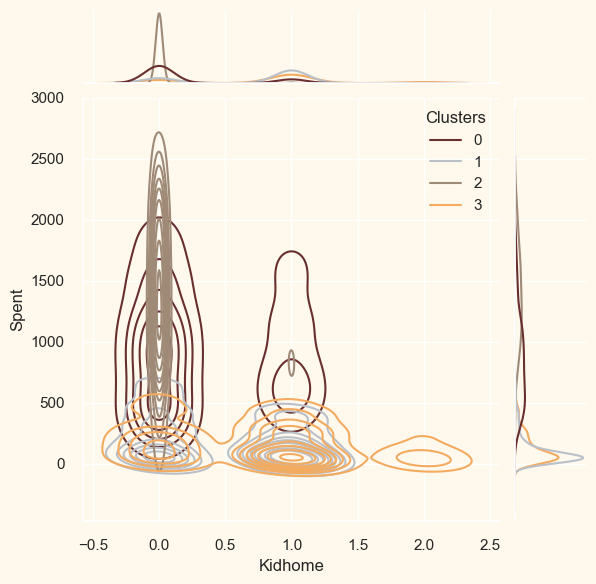

<Figure size 800x550 with 0 Axes>

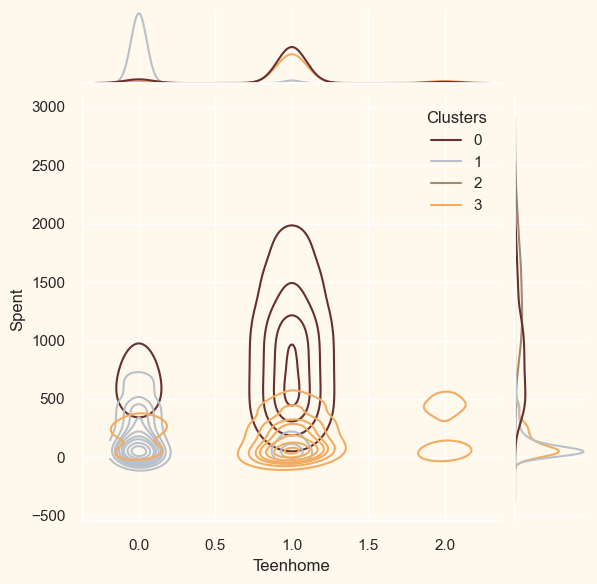

<Figure size 800x550 with 0 Axes>

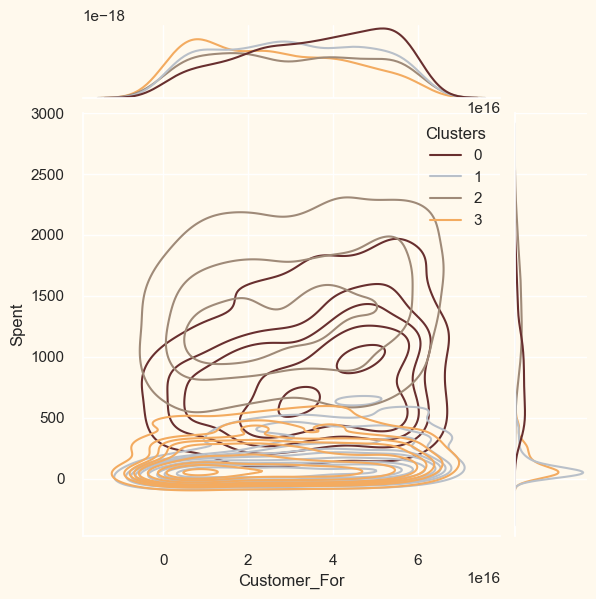

<Figure size 800x550 with 0 Axes>

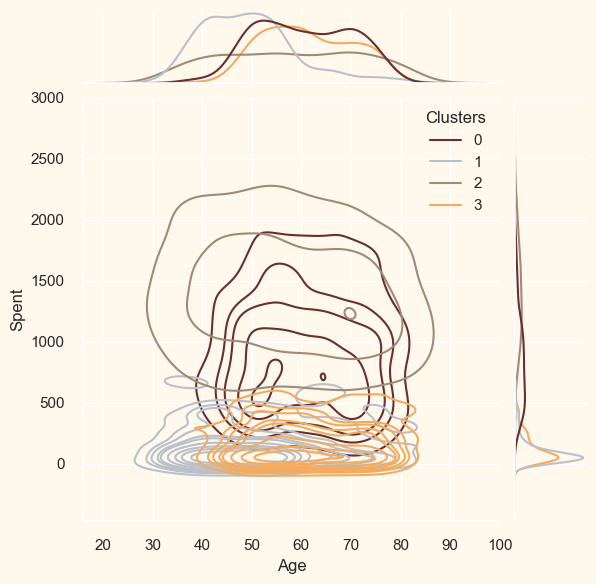

<Figure size 800x550 with 0 Axes>

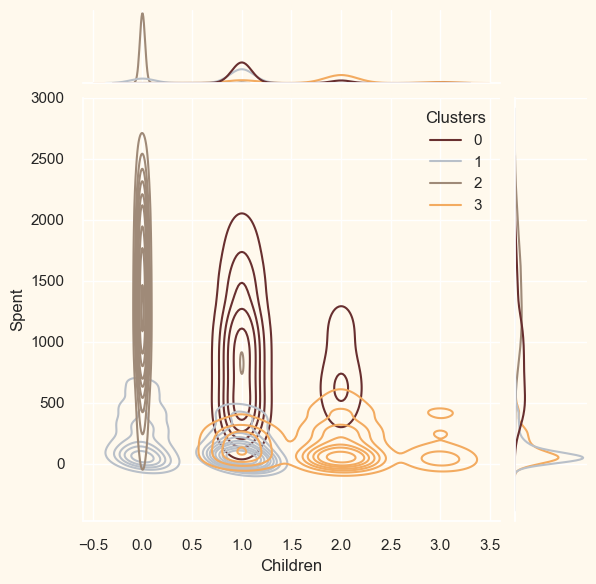

<Figure size 800x550 with 0 Axes>

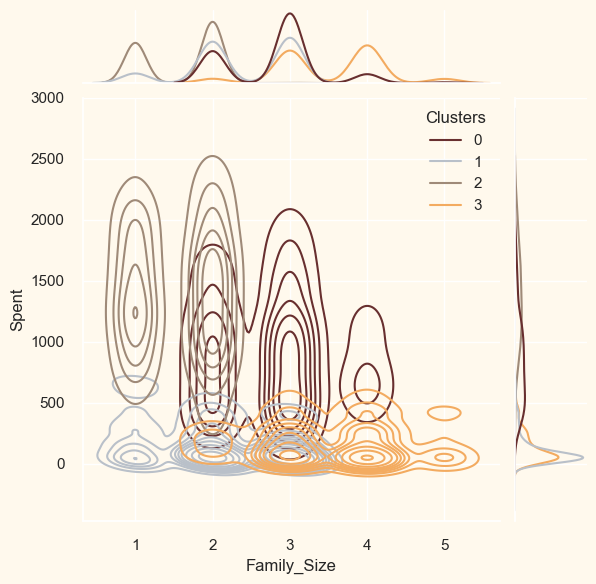

<Figure size 800x550 with 0 Axes>

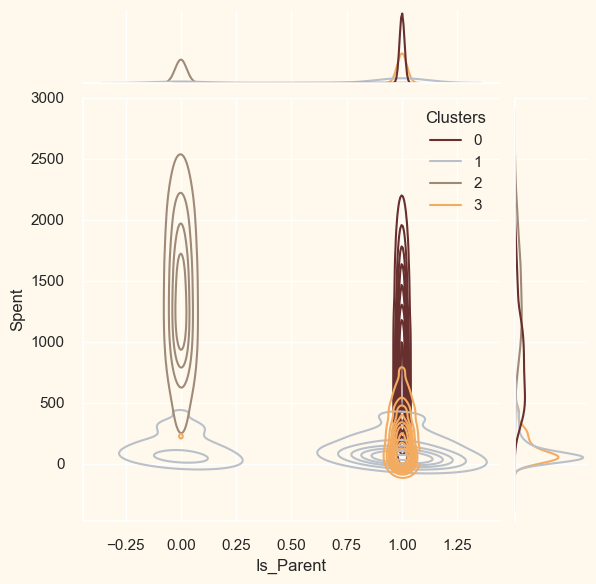

<Figure size 800x550 with 0 Axes>

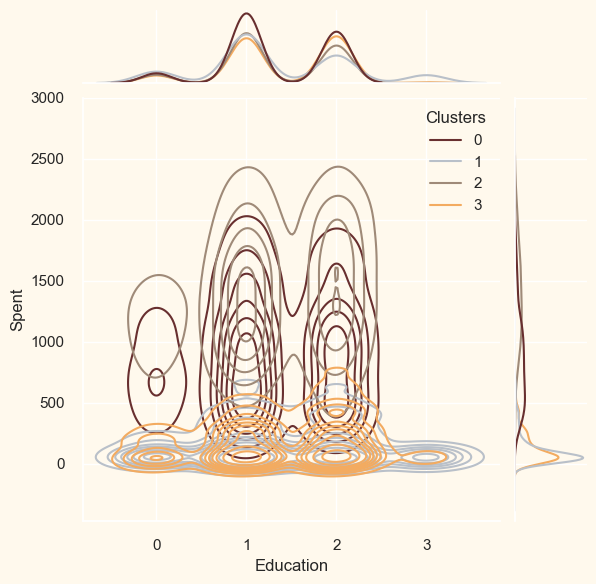

<Figure size 800x550 with 0 Axes>

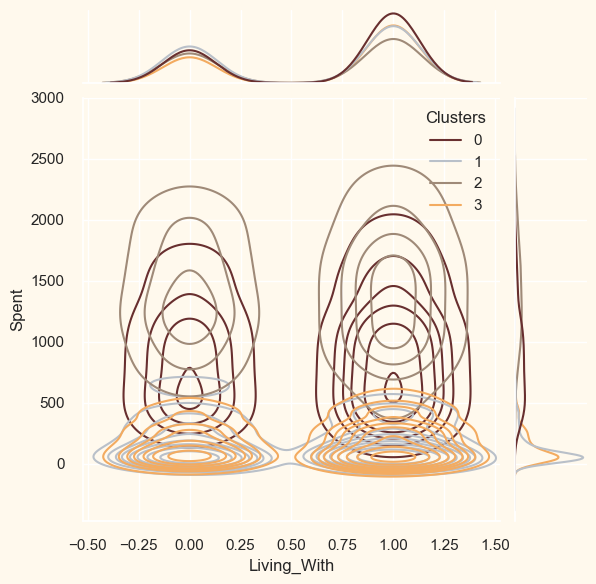

In [29]:
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x= df[i], y= df['Spent'], hue= df['Clusters'], kind="kde", palette=pal)
    plt.show()